# Testing new AMM


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

# Experiments
from model import run
from model import processing
#from model.plot_utils import *
from model import plot_utils as pu
from model import init_utils



########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC
LP1 = {'omniR1': 500000}
LP2 = {'omniR2': 1500000}
trader = {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000}

# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1, 'LP2': LP2}
#agent_d = {'Trader': trader, 'LP1': LP1}


########## ACTION CONFIGURATION ##########

action_dict = {
    'sell_hdx_for_r1': {'token_buy': 'R1', 'token_sell': 'HDX', 'amount_sell': 2000, 'action_id': 'Trade', 'agent_id': 'Trader'},
    'sell_r1_for_hdx': {'token_sell': 'R1', 'token_buy': 'HDX', 'amount_sell': 1000, 'action_id': 'Trade', 'agent_id': 'Trader'}
}

# list of (action, number of repititions of action), timesteps = sum of repititions of all actions
block_count = 100
action_ls = [('trades', block_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trades': {
        'trade_types': {'sell_hdx_for_r1': 0.5, 'sell_r1_for_hdx': 0.5},
        'n': 5}
}



########## CFMM INITIALIZATION ##########

# Todo: generalize
initial_values = {
    'token_list': ['R1','R2'],
    'R': [500000,1500000],
    'P': [2,2/3],
    'fee_assets': 0,
    'fee_HDX': 0
}
#initial_values['H'] = [initial_values['Q'] * initial_values['W'][i] for i in range(len(initial_values['token_list']))]
#initial_values['D'] = copy.deepcopy(initial_values['H'])

#amms = [balancer_amm, reweighting_amm]
#amm_types = ['Balancer', 'Reweighting']
#amms = [reweighting_amm]
#amm_types = ['Reweighting']
#labels = amm_types
initial_list = []
config_params = {
    'batch': True,
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 4, 1, 2)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.03s


In [2]:
rdf, agent_df = processing.postprocessing(events)


In [3]:
%matplotlib inline



In [4]:
rdf.head(20)

,R-0,R-1,Q-0,Q-1,S-0,S-1,A-0,A-1,B-0,B-1,...,token_list-0,token_list-1,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
2,500996.02,1500000,998011.93,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,1
4,501984.08,1500000,996047.52,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,2
6,502964.24,1500000,994106.46,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,3
8,503936.54,1500000,992188.42,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,4
10,502895.41,1500000,994242.51,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,5
12,501866.78,1500000,996280.33,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,6
14,498860.99,1500000,1002283.22,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,7
16,497880.51,1500000,1004257.02,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,8
18,496911.68,1500000,1006215.03,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,9
20,497932.25,1500000,1004152.67,1000000.00,500000,1500000,0,0,0,0,...,R1,R2,0,0,2,0,0,1,2,10


In [5]:
agent_df.tail(20)

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
565,0,0,1,2,94,LP1,0.00,500000,0,0.00,0,2.00,0.00
566,0,0,1,2,94,LP2,0.00,0,1500000,0.00,0,0.00,0.67
570,0,0,1,2,95,Trader,994600.41,0,0,1002685.30,1000000,0.00,0.00
571,0,0,1,2,95,LP1,0.00,500000,0,0.00,0,2.00,0.00
572,0,0,1,2,95,LP2,0.00,0,1500000,0.00,0,0.00,0.67
576,0,0,1,2,96,Trader,996653.00,0,0,1001667.92,1000000,0.00,0.00
577,0,0,1,2,96,LP1,0.00,500000,0,0.00,0,2.00,0.00
578,0,0,1,2,96,LP2,0.00,0,1500000,0.00,0,0.00,0.67
582,0,0,1,2,97,Trader,994687.71,0,0,1002642.11,1000000,0.00,0.00
583,0,0,1,2,97,LP1,0.00,500000,0,0.00,0,2.00,0.00


## Analysis

[0]


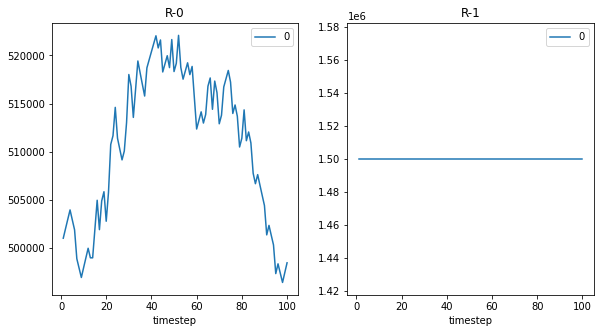

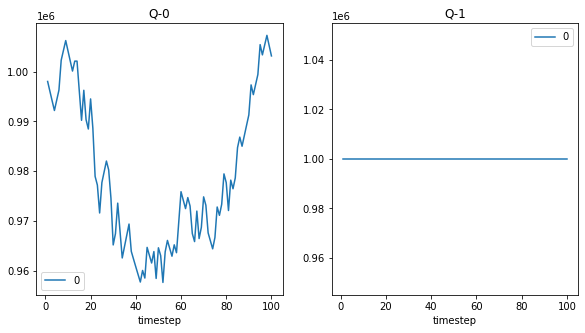

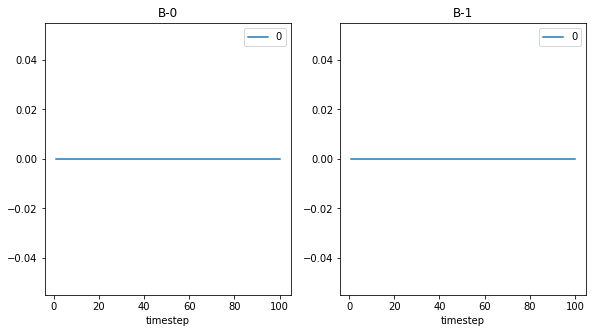

In [6]:
var_list = ['R', 'Q', 'B']
pu.plot_vars(rdf, var_list)


[0]


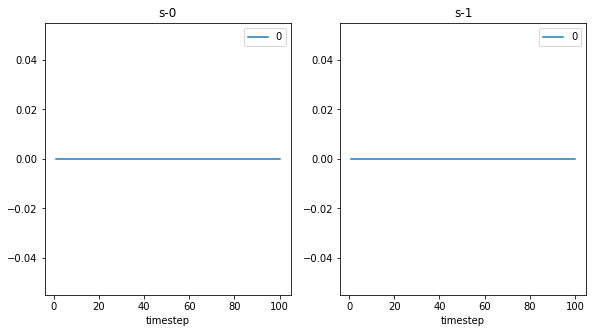

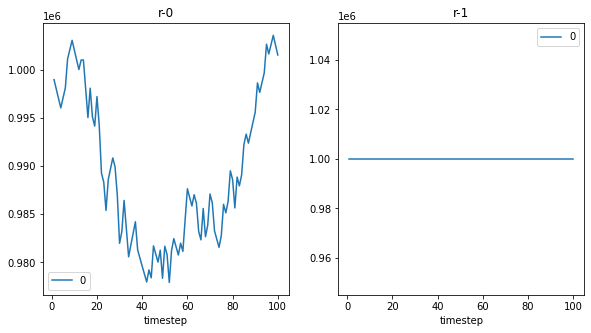

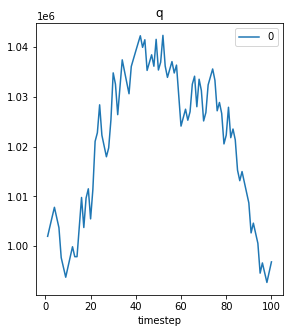

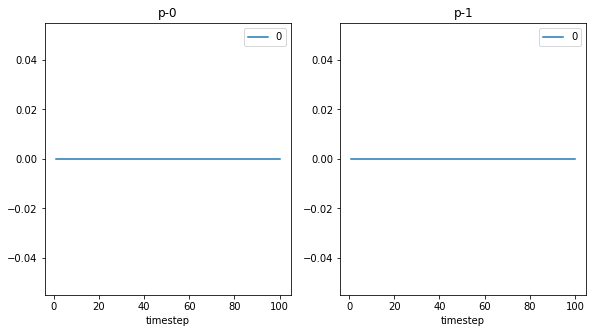

In [7]:
var_list = ['s', 'r', 'q', 'p']
trader_df = agent_df[agent_df['agent_label'] == 'Trader']
pu.plot_vars(trader_df, var_list)


In [8]:
# merge agent_df, rdf to one df on timesteps, run, etc

merged_df = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])

In [9]:
# add IL column to agent DF, where val_hold is calculated using initial holdings from agent_d
#val hold: withdraw liquidity at t=0, calculate value with prices at t
#val pool: withdraw liquidity at t, calculate value with prices at t

merged_df['val_pool'] = merged_df.apply(lambda x: processing.val_pool(x), axis=1)
withdraw_agent_d = processing.get_withdraw_agent_d(initial_values, agent_d)
merged_df['val_hold'] = merged_df.apply(lambda x: processing.val_hold(x, withdraw_agent_d), axis=1)
merged_df['IL'] = merged_df.apply(lambda x: x['val_pool']/x['val_hold'] - 1, axis=1)
merged_df['pool_val'] = merged_df.apply(lambda x: processing.pool_val(x), axis=1)
#merged_df['pool_loss'] = merged_df.apply(lambda x: x['pool_val']/2000000 - 1, axis=1)

merged_df[['timestep', 'agent_label', 'q','Q-0','B-0','s-0','S-0','r-0','R-0','val_pool', 'val_hold','IL','pool_val', 'p-0']].tail()


# compute val hold column


# compute val pool column

# compute IL

# plot Impermanent loss
# 

,timestep,agent_label,q,Q-0,B-0,s-0,S-0,r-0,R-0,val_pool,val_hold,IL,pool_val,p-0
295,99,LP1,0.00,1005186.92,0,500000,500000,0.00,497419.92,1010387.23,1010400.75,-0.00,2005186.92,2.00
296,99,LP2,0.00,1005186.92,0,0,500000,0.00,497419.92,1000000.00,1000000.00,0.00,2005186.92,0.00
297,100,Trader,996863.12,1003136.88,0,0,500000,1001563.54,498436.46,3679243.72,3679233.88,0.00,2003136.88,0.00
298,100,LP1,0.00,1003136.88,0,500000,500000,0.00,498436.46,1006278.67,1006283.61,-0.00,2003136.88,2.00
299,100,LP2,0.00,1003136.88,0,0,500000,0.00,498436.46,1000000.00,1000000.00,0.00,2003136.88,0.00


In [10]:
merged_df[merged_df['agent_label'] == 'LP2'][['timestep', 'agent_label', 'q','Q-0','B-0','s-0','S-0','r-0','R-0','val_pool', 'val_hold','IL','pool_val']].head(20)


,timestep,agent_label,q,Q-0,B-0,s-0,S-0,r-0,R-0,val_pool,val_hold,IL,pool_val
2,1,LP2,0.00,998011.93,0,0,500000,0.00,500996.02,1000000.00,1000000.00,0.00,1998011.93
5,2,LP2,0.00,996047.52,0,0,500000,0.00,501984.08,1000000.00,1000000.00,0.00,1996047.52
8,3,LP2,0.00,994106.46,0,0,500000,0.00,502964.24,1000000.00,1000000.00,0.00,1994106.46
11,4,LP2,0.00,992188.42,0,0,500000,0.00,503936.54,1000000.00,1000000.00,0.00,1992188.42
14,5,LP2,0.00,994242.51,0,0,500000,0.00,502895.41,1000000.00,1000000.00,0.00,1994242.51
17,6,LP2,0.00,996280.33,0,0,500000,0.00,501866.78,1000000.00,1000000.00,0.00,1996280.33
20,7,LP2,0.00,1002283.22,0,0,500000,0.00,498860.99,1000000.00,1000000.00,0.00,2002283.22
23,8,LP2,0.00,1004257.02,0,0,500000,0.00,497880.51,1000000.00,1000000.00,0.00,2004257.02
26,9,LP2,0.00,1006215.03,0,0,500000,0.00,496911.68,1000000.00,1000000.00,0.00,2006215.03
29,10,LP2,0.00,1004152.67,0,0,500000,0.00,497932.25,1000000.00,1000000.00,0.00,2004152.67


In [11]:
LP1_merged_df = merged_df[merged_df['agent_label'] == 'LP1']
LP1_merged_df[['timestep', 'agent_label', 'q','Q-0','B-0','s-0','S-0','r-0','R-0','val_pool', 'val_hold','IL','pool_val']].head(50)

,timestep,agent_label,q,Q-0,B-0,s-0,S-0,r-0,R-0,val_pool,val_hold,IL,pool_val
1,1,LP1,0.00,998011.93,0,500000,500000,0.00,500996.02,996025.84,996027.81,-0.00,1998011.93
4,2,LP1,0.00,996047.52,0,500000,500000,0.00,501984.08,992102.89,992110.67,-0.00,1996047.52
7,3,LP1,0.00,994106.46,0,500000,500000,0.00,502964.24,988230.39,988247.66,-0.00,1994106.46
10,4,LP1,0.00,992188.42,0,500000,500000,0.00,503936.54,984407.58,984437.85,-0.00,1992188.42
13,5,LP1,0.00,994242.51,0,500000,500000,0.00,502895.41,988501.69,988518.17,-0.00,1994242.51
16,6,LP1,0.00,996280.33,0,500000,500000,0.00,501866.78,992567.61,992574.51,-0.00,1996280.33
19,7,LP1,0.00,1002283.22,0,500000,500000,0.00,498860.99,1004569.05,1004571.66,-0.00,2002283.22
22,8,LP1,0.00,1004257.02,0,500000,500000,0.00,497880.51,1008523.07,1008532.17,-0.00,2004257.02
25,9,LP1,0.00,1006215.03,0,500000,500000,0.00,496911.68,1012449.26,1012468.69,-0.00,2006215.03
28,10,LP1,0.00,1004152.67,0,500000,500000,0.00,497932.25,1008313.93,1008322.58,-0.00,2004152.67


## Conclusion



[0]


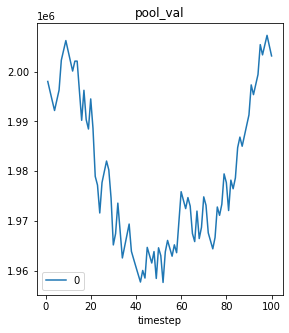

<Figure size 1080x360 with 0 Axes>

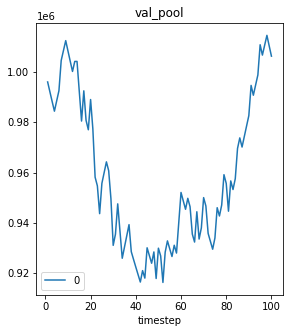

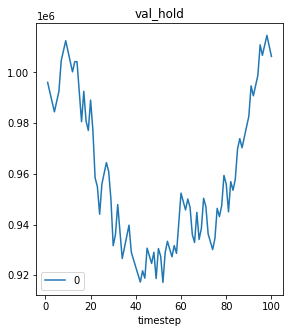

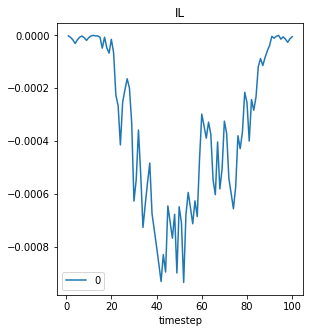

<Figure size 1080x360 with 0 Axes>

In [12]:
var_list = ['pool_val', 'pool_loss', 'val_pool', 'val_hold', 'IL', 'pool_loss']
LP1_merged_df = merged_df[merged_df['agent_label'] == 'LP1']
pu.plot_vars(LP1_merged_df, var_list)